# 🏎️ Formula 1 Data Analysis Notebook

Explore comprehensive visual insights into Formula 1 racing from historical race results, safety incidents, team and driver statistics, and circuit demographics.

**Tools Used:** `pandas`, `matplotlib`, `seaborn`, `plotly`
**Data Sources:** OpenF1 public datasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Universal horizontal bar chart function
def plot_barh(df, x, y, title, color='blue'):
    df.plot(kind='barh', x=x, y=y, color=color, figsize=(10, 6), title=title)
    plt.xlabel(x)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Line chart utility
def plot_line(df, x, y, title, xlabel, ylabel, color='blue'):
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df, x=x, y=y, marker='o', color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Load races only once
races = pd.read_csv("races.csv")
races['date'] = pd.to_datetime(races['date'], errors='coerce')
races['year'] = races['date'].dt.year

# 🏎️ Formula 1 Exploratory Data Analysis (EDA)

This notebook presents a comprehensive analysis of Formula 1 data, exploring race performance, driver achievements, constructor dominance, safety statistics, and geographical trends.

**Tools:** Python, Pandas, Matplotlib, Seaborn, Plotly
**Data:** OpenF1 Datasets

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Universal barh chart function
def plot_barh(df, x, y, title, color='blue'):
    df.plot(kind='barh', x=x, y=y, color=color, figsize=(10, 6), title=title)
    plt.xlabel(x)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

## 📥 Load and Preview Data

In [6]:
circuits = pd.read_csv("/content/circuits.csv")
constructor_results = pd.read_csv("/content/constructor_results.csv")
constructor_standings = pd.read_csv("/content/constructor_standings.csv")
constructors = pd.read_csv("/content/constructors.csv")
driver_standings = pd.read_csv("/content/driver_standings.csv")
drivers = pd.read_csv("/content/drivers.csv")
fatal_drivers = pd.read_csv("/content/fatal_accidents_drivers.csv")
fatal_marshalls = pd.read_csv("/content/fatal_accidents_marshalls.csv")
lap_times = pd.read_csv("/content/lap_times.csv")
pit_stops = pd.read_csv("/content/pit_stops.csv")
qualifying = pd.read_csv("/content/qualifying.csv")
red_flags = pd.read_csv("/content/red_flags.csv")
safety_cars = pd.read_csv("/content/safety_cars.csv")
seasons = pd.read_csv("/content/seasons.csv")
sprint_results = pd.read_csv("/content/sprint_results.csv")
status = pd.read_csv("/content/status.csv")


In [7]:
dfs = [circuits, constructor_results, constructor_standings, constructors,
       driver_standings, drivers, fatal_drivers, fatal_marshalls, lap_times,
       pit_stops, qualifying, races, red_flags, safety_cars, seasons,
       sprint_results, status]

for df in dfs:
    print(f"\n{df.shape}\n{df.columns}\n{df.isnull().sum()}")



(77, 9)
Index(['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng',
       'alt', 'url'],
      dtype='object')
circuitId     0
circuitRef    0
name          0
location      0
country       0
lat           0
lng           0
alt           0
url           0
dtype: int64

(12625, 5)
Index(['constructorResultsId', 'raceId', 'constructorId', 'points', 'status'], dtype='object')
constructorResultsId    0
raceId                  0
constructorId           0
points                  0
status                  0
dtype: int64

(13391, 7)
Index(['constructorStandingsId', 'raceId', 'constructorId', 'points',
       'position', 'positionText', 'wins'],
      dtype='object')
constructorStandingsId    0
raceId                    0
constructorId             0
points                    0
position                  0
positionText              0
wins                      0
dtype: int64

(212, 5)
Index(['constructorId', 'constructorRef', 'name', 'nationality', 'url'], dtype='object')
const

In [8]:
races = races.merge(circuits, on='circuitId', how='left')
driver_standings = driver_standings.merge(drivers, on='driverId', how='left')
constructor_standings = constructor_standings.merge(constructors, on='constructorId', how='left')


## 📊 Driver and Constructor Performance

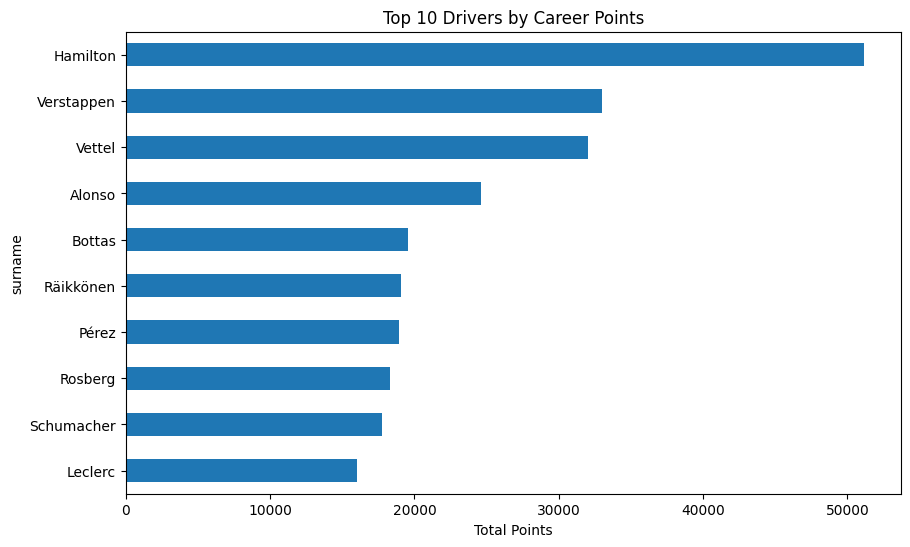

In [9]:
top_drivers = driver_standings.groupby('surname')['points'].sum().sort_values(ascending=False).head(10)
top_drivers.plot(kind='barh', title='Top 10 Drivers by Career Points', figsize=(10, 6))
plt.xlabel("Total Points")
plt.gca().invert_yaxis()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Ferrari'),
  Text(1, 0, 'Red Bull'),
  Text(2, 0, 'Mercedes'),
  Text(3, 0, 'McLaren'),
  Text(4, 0, 'Williams'),
  Text(5, 0, 'Renault'),
  Text(6, 0, 'Force India'),
  Text(7, 0, 'Team Lotus'),
  Text(8, 0, 'Lotus F1'),
  Text(9, 0, 'Benetton')])

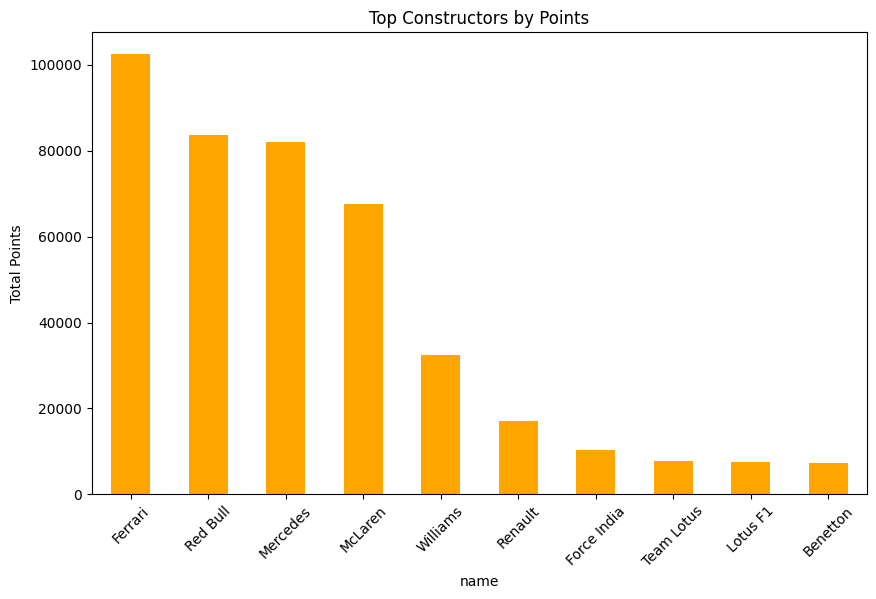

In [10]:
top_constructors = constructor_standings.groupby('name')['points'].sum().sort_values(ascending=False).head(10)
top_constructors.plot(kind='bar', title='Top Constructors by Points', figsize=(10, 6), color='orange')
plt.ylabel("Total Points")
plt.xticks(rotation=45)


## ⚙️ Fastest Average Pit Stops

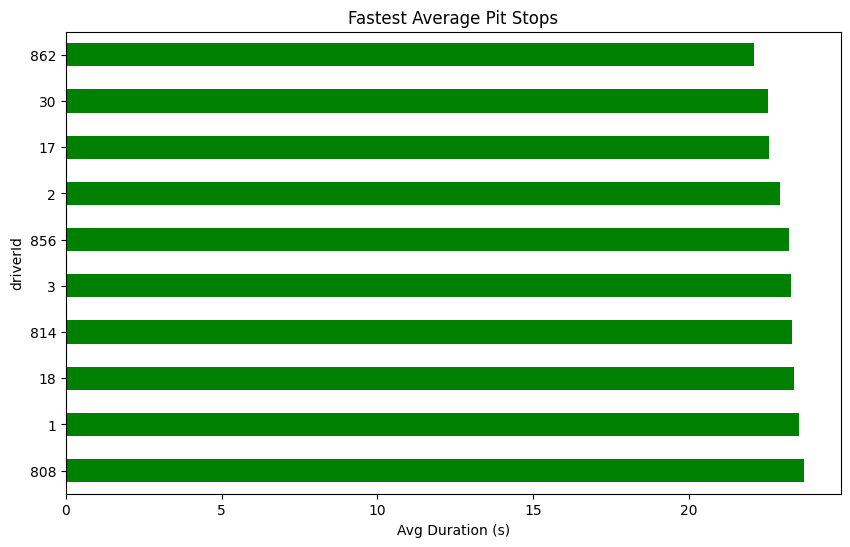

In [11]:
pit_stops['duration'] = pd.to_numeric(pit_stops['duration'], errors='coerce')
avg_pit_stop = pit_stops.groupby('driverId')['duration'].mean().sort_values().head(10)
avg_pit_stop.plot(kind='barh', title='Fastest Average Pit Stops', figsize=(10, 6), color='green')
plt.xlabel("Avg Duration (s)")
plt.gca().invert_yaxis()


In [12]:
print(fatal_drivers.columns)

Index(['Driver', 'Age', 'Date Of Accident', 'Event', 'Car', 'Session'], dtype='object')


## 🧯 Safety and Incidents Analysis

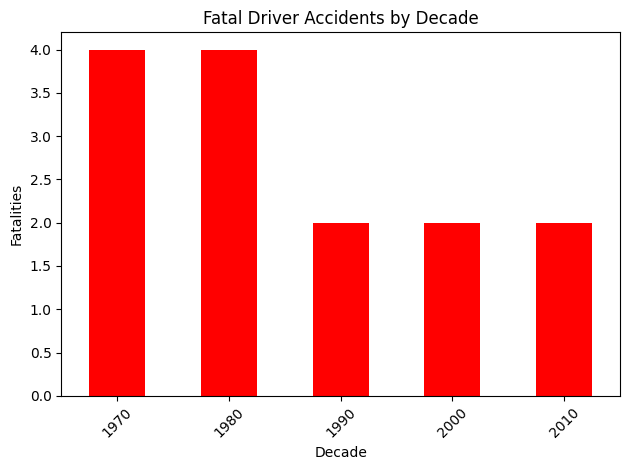

In [18]:
# Ensure datetime format
fatal_drivers['Date Of Accident'] = pd.to_datetime(fatal_drivers['Date Of Accident'], errors='coerce')

# Filter out future dates
fatal_drivers = fatal_drivers[fatal_drivers['Date Of Accident'].dt.year <= 2025]

# Compute decades
fatal_drivers['decade'] = (fatal_drivers['Date Of Accident'].dt.year // 10) * 10
fatalities_by_decade = fatal_drivers['decade'].value_counts().sort_index()

# Plot
fatalities_by_decade.plot(kind='bar', title='Fatal Driver Accidents by Decade', color='red')
plt.ylabel("Fatalities")
plt.xlabel("Decade")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


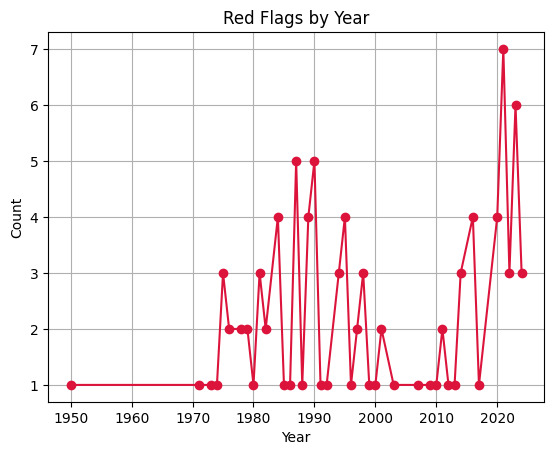

In [15]:
import re

# Extract year from 'Race' column
red_flags['year'] = red_flags['Race'].str.extract(r'(\d{4})').astype(float)

# Count red flags per year
red_flags_by_year = red_flags['year'].value_counts().sort_index()

# Plot
red_flags_by_year.plot(kind='line', title='Red Flags by Year', marker='o', color='crimson')
plt.ylabel("Count")
plt.xlabel("Year")
plt.grid(True)


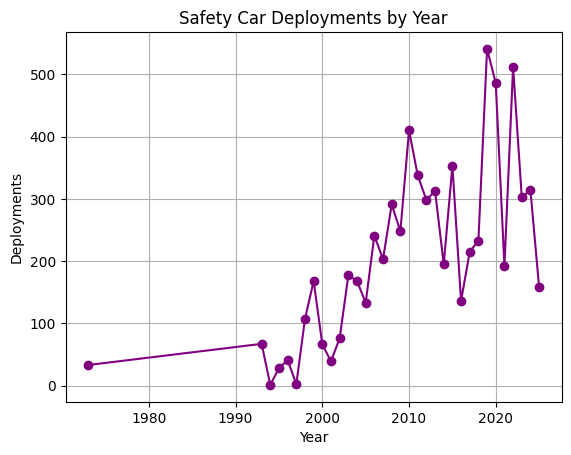

In [16]:
safety_cars['year'] = safety_cars['Race'].str.extract(r'(\d{4})').astype(float)
safety_cars['Deployed'] = pd.to_numeric(safety_cars['Deployed'], errors='coerce')
sc_deployments = safety_cars.groupby('year')['Deployed'].sum()
sc_deployments.plot(kind='line', title='Safety Car Deployments by Year', color='purple', marker='o')
plt.ylabel("Deployments")
plt.xlabel("Year")
plt.grid(True)


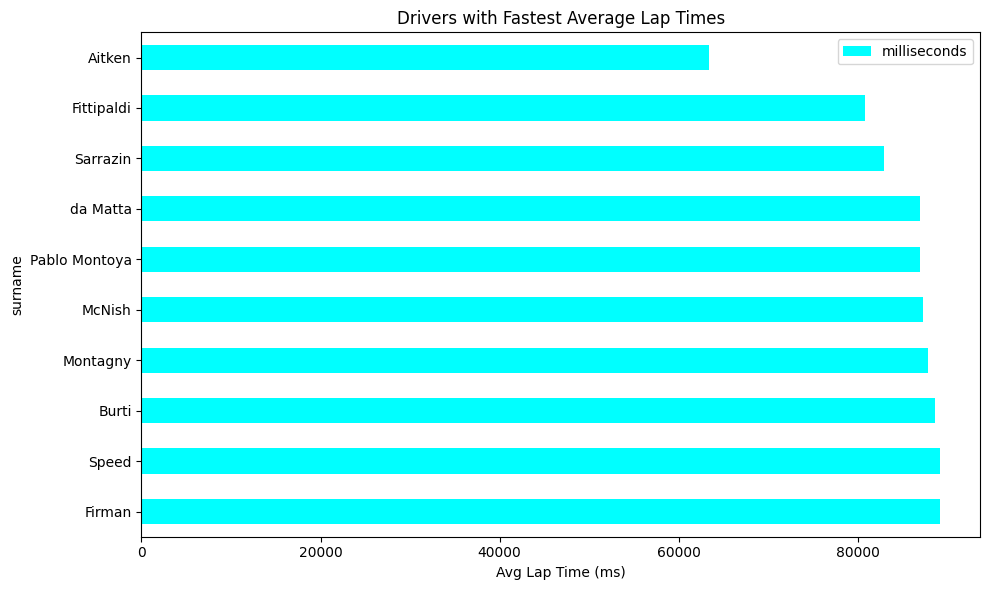

In [22]:
# Calculate average lap time
fastest_laps = lap_times.groupby('driverId')['milliseconds'].mean().reset_index()

# Merge with drivers dataframe to get names
fastest_laps = fastest_laps.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Sort and select top 10
top_fastest = fastest_laps.sort_values(by='milliseconds').head(10)

# Plot
top_fastest.plot(kind='barh', x='surname', y='milliseconds',
                 title='Drivers with Fastest Average Lap Times', color='cyan', figsize=(10, 6))
plt.xlabel("Avg Lap Time (ms)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


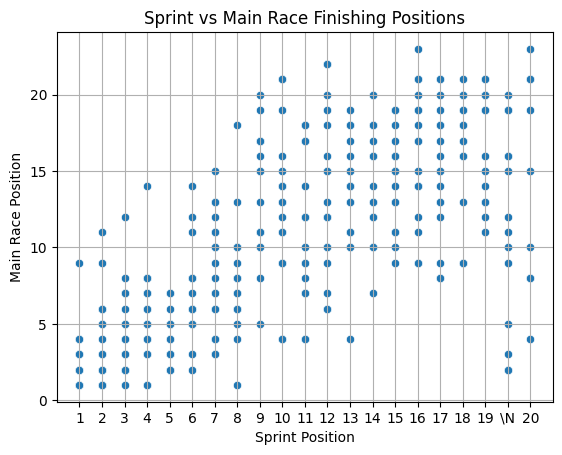

In [19]:
merged_sprint = sprint_results.merge(driver_standings[['raceId', 'driverId', 'position']],
                                     on=['raceId', 'driverId'], how='left', suffixes=('_sprint', '_main'))

sns.scatterplot(data=merged_sprint, x='position_sprint', y='position_main')
plt.title("Sprint vs Main Race Finishing Positions")
plt.xlabel("Sprint Position")
plt.ylabel("Main Race Position")
plt.grid(True)


In [20]:
# Merge constructor standings with race year
constructor_standings_merged = constructor_standings.merge(races[['raceId', 'year']], on='raceId', how='left')

# Filter years
teams_last_5_years = constructor_standings_merged[constructor_standings_merged['year'].between(2020, 2025)]
unique_teams = teams_last_5_years['constructorId'].nunique()

print(f"Number of unique teams between 2020 and 2025: {unique_teams}")


Number of unique teams between 2020 and 2025: 14


In [21]:
num_circuits = circuits['circuitId'].nunique()
print(f"Total number of circuits: {num_circuits}")


Total number of circuits: 77


## 🏎️ Sprint Races Since 2022

In [ ]:
import pandas as pd

# Load datasets
circuits = pd.read_csv("circuits.csv")

# Convert 'date' to datetime and extract year

# Filter races that had a sprint session (non-null sprint_date)
races_with_sprint = races[~races['sprint_date'].isna()]

# Keep only races between 2022 and 2025
races_with_sprint = races_with_sprint[races_with_sprint['year'].between(2022, 2025)]

# Merge with circuits to get circuit details
sprint_race_locations = races_with_sprint.merge(circuits, on='circuitId', how='left')

# Select relevant columns and clean names
sprint_race_locations = sprint_race_locations[['year', 'name_x', 'name_y', 'location', 'country']].sort_values(by=['year', 'name_x'])
sprint_race_locations.columns = ['Year', 'Race Name', 'Circuit Name', 'Location', 'Country']

# Display the final table
print("Sprint Races Held from 2022 to 2025:\n")
print(sprint_race_locations)


Sprint Races Held from 2022 to 2025:

    Year                 Race Name                    Circuit Name  \
21  2022      Abu Dhabi Grand Prix              Yas Marina Circuit   
2   2022     Australian Grand Prix  Albert Park Grand Prix Circuit   
10  2022       Austrian Grand Prix                   Red Bull Ring   
7   2022     Azerbaijan Grand Prix               Baku City Circuit   
0   2022        Bahrain Grand Prix   Bahrain International Circuit   
..   ...                       ...                             ...   
45  2024  Saudi Arabian Grand Prix         Jeddah Corniche Circuit   
61  2024      Singapore Grand Prix       Marina Bay Street Circuit   
53  2024        Spanish Grand Prix  Circuit de Barcelona-Catalunya   
64  2024      São Paulo Grand Prix      Autódromo José Carlos Pace   
62  2024  United States Grand Prix         Circuit of the Americas   

      Location       Country  
21   Abu Dhabi           UAE  
2    Melbourne     Australia  
10   Spielberg       Austria

## 🙌🏻 Drivers with most Championships

In [ ]:
import pandas as pd

# Load the datasets
driver_standings = pd.read_csv("driver_standings.csv")
drivers = pd.read_csv("drivers.csv")

# Convert race date and extract year

# Merge standings with races to get year
driver_standings_merged = driver_standings.merge(races[['raceId', 'year']], on='raceId', how='left')

# Get only drivers who finished the season as champion (position 1)
champions = driver_standings_merged[driver_standings_merged['position'] == 1]

# Merge with drivers to get names
champions = champions.merge(drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')

# Count number of championships
driver_championships = champions.groupby(['driverId', 'forename', 'surname']).size().reset_index(name='titles')
driver_championships = driver_championships.sort_values(by='titles', ascending=False)

# Display the result
print("Drivers by Number of Championships:")
print(driver_championships)


Drivers by Number of Championships:
    driverId   forename     surname  titles
0          1      Lewis    Hamilton     125
11        30    Michael  Schumacher     121
19       117      Alain       Prost      79
60       830        Max  Verstappen      78
9         20  Sebastian      Vettel      63
..       ...        ...         ...     ...
36       231      James        Hunt       1
40       341       John     Surtees       1
52       577      Luigi       Musso       1
46       385    Lorenzo     Bandini       1
51       554       Jean       Behra       1

[62 rows x 4 columns]


## 👏🏻 Teams with most Constructors Championships

In [ ]:
# Load datasets
constructor_standings = pd.read_csv("constructor_standings.csv")
constructors = pd.read_csv("constructors.csv")

# Ensure year is available in standings

# Merge standings with year
constructor_standings_merged = constructor_standings.merge(races[['raceId', 'year']], on='raceId', how='left')

# Filter to constructors who won (position 1)
constructor_champions = constructor_standings_merged[constructor_standings_merged['position'] == 1]

# Merge with constructors to get names
constructor_champions = constructor_champions.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')

# Count championships
team_championships = constructor_champions.groupby(['constructorId', 'name']).size().reset_index(name='titles')
team_championships = team_championships.sort_values(by='titles', ascending=False)

# Display the result
print("Constructors by Number of Championships:")
print(team_championships)

Constructors by Number of Championships:
    constructorId             name  titles
4               6          Ferrari     234
0               1          McLaren     173
17            131         Mercedes     145
5               9         Red Bull     124
2               3         Williams     114
3               4          Renault      46
10             32       Team Lotus      44
6              22         Benetton      29
20            172     Lotus-Climax      23
19            170    Cooper-Climax      20
7              23            Brawn      17
22            191    Brabham-Repco      16
8              25          Tyrrell      16
14             66              BRM      14
21            180       Lotus-Ford      12
23            196       Matra-Ford      11
11             34          Brabham       6
15             87           Cooper       4
9              27           Ligier       4
16            118          Vanwall       3
12             37            March       3
1            

## 🏎️ Top 5 Drivers and Teams

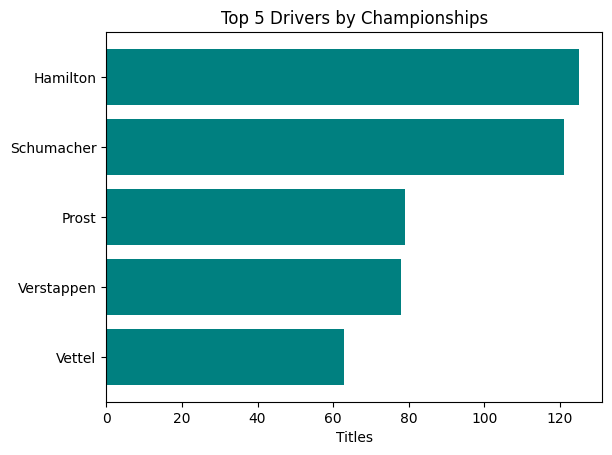

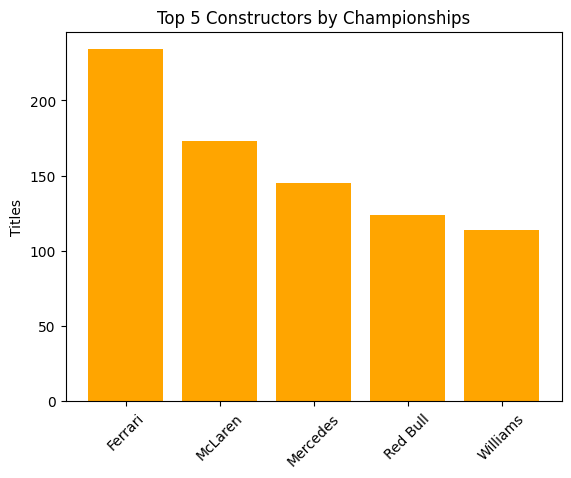

In [ ]:
# Top 5 drivers
top5_drivers = driver_championships.head(5)
plt.barh(top5_drivers['surname'], top5_drivers['titles'], color='teal')
plt.title("Top 5 Drivers by Championships")
plt.xlabel("Titles")
plt.gca().invert_yaxis()

# Top 5 teams
top5_teams = team_championships.head(5)
plt.bar(top5_teams['name'], top5_teams['titles'], color='orange')
plt.title("Top 5 Constructors by Championships")
plt.ylabel("Titles")
plt.xticks(rotation=45)


## 🌏 Circuits that Hosted races in the last 15 years

In [ ]:
import pandas as pd
import plotly.express as px

# Load datasets
circuits = pd.read_csv("circuits.csv")

# Extract year from race dates

# Filter races from the last 15 years

# Merge with circuit info
recent_circuits = recent_races.merge(circuits, on='circuitId', how='left')

# Select unique circuits and format
circuit_map = recent_circuits[['name_y', 'location', 'country', 'lat', 'lng']].drop_duplicates()
circuit_map.columns = ['Circuit Name', 'City', 'Country', 'Latitude', 'Longitude']

# Plot enhanced map
fig = px.scatter_geo(
    circuit_map,
    lat='Latitude',
    lon='Longitude',
    hover_name='Circuit Name',
    hover_data={'Latitude': False, 'Longitude': False, 'City': True, 'Country': True},
    title='F1 Circuits Hosting Races (Last 15 Years)',
    projection='natural earth'
)

# Enhance marker and layout styling
fig.update_traces(marker=dict(size=5, color='red', line=dict(width=1, color='darkred')))
fig.update_geos(showland=True, landcolor="LightGrey", showcountries=True, countrycolor="white")
fig.update_layout(
    showlegend=False,
    margin=dict(l=0, r=0, t=40, b=0),
    title_x=0.5
)

fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Load circuit data
circuits = pd.read_csv("circuits.csv")


recent_circuits = recent_races.merge(circuits, on='circuitId')[['name_y', 'location', 'country', 'lat', 'lng']].drop_duplicates()
recent_circuits.columns = ['Circuit Name', 'City', 'Country', 'Latitude', 'Longitude']

fig = px.scatter_geo(recent_circuits, lat='Latitude', lon='Longitude', hover_name='Circuit Name',
                     color='Country', title='F1 Circuits (Last 15 Years)', projection='natural earth')
fig.update_traces(marker=dict(size=6))
fig.show()



## 🏆 Longest Driver championship streak in a row

In [23]:
# Filter to champions
champions = driver_standings[driver_standings['position'] == 1]
champions = champions.merge(races[['raceId', 'year']], on='raceId', how='left')

# Calculate streaks using driverId
champions = champions.sort_values(['driverId', 'year'])
champions['streak_block'] = champions['year'] - champions.groupby('driverId').cumcount()

# Group and count streaks
streaks = champions.groupby(['driverId', 'streak_block']).size().reset_index(name='Streak')

# Get the longest streak per driver
longest_streaks = streaks.groupby('driverId')['Streak'].max().reset_index()

# Merge with driver names
longest_streaks = longest_streaks.merge(drivers[['driverId', 'surname']], on='driverId', how='left')
longest_streaks = longest_streaks.sort_values(by='Streak', ascending=False).head(10)

# Display
print("🏆 Longest Driver Championship Streaks:")
print(longest_streaks)


🏆 Longest Driver Championship Streaks:
    driverId  Streak    surname
0          1       3   Hamilton
2          4       3     Alonso
3          8       3  Räikkönen
8         18       3     Button
19       117       3      Prost
16        95       3    Mansell
28       199       3  Reutemann
20       137       3     Piquet
26       182       3      Lauda
37       289       3       Hill


## ⭕️ Number of Races per seaon, Circutes introduced in the last decade

In [32]:
import pandas as pd

# Load datasets
races = pd.read_csv("races.csv")
circuits = pd.read_csv("circuits.csv")

# Convert race date and extract year
races['date'] = pd.to_datetime(races['date'], errors='coerce')
races['year'] = races['date'].dt.year

# 1. Number of races per season
races_per_season = races['year'].value_counts().sort_index().reset_index()
races_per_season.columns = ['Year', 'Number of Races']
print("\n✅ Number of Races Per Season:\n")
print(races_per_season)

# 2. Circuits used each year (using circuitRef)
races_circuits = races.merge(circuits[['circuitId', 'circuitRef']], on='circuitId', how='left')
circuits_per_year = races_circuits.groupby('year')['circuitRef'].unique().reset_index()
circuits_per_year.columns = ['Year', 'Circuits Used']
print("\n✅ Circuits Used Each Year:\n")
print(circuits_per_year)

# 3. New circuits introduced in the last decade (relative to latest year)
latest_year = races['year'].max()
last_decade_races = races[races['year'] >= latest_year - 9]
previous_races = races[races['year'] < latest_year - 9]

recent_circuits = last_decade_races['circuitId'].unique()
older_circuits = previous_races['circuitId'].unique()
new_circuit_ids = set(recent_circuits) - set(older_circuits)

new_circuits = circuits[circuits['circuitId'].isin(new_circuit_ids)][['circuitId', 'circuitRef', 'location', 'country']]
print("\n✅ New Circuits Introduced in the Last Decade:\n")
print(new_circuits)



✅ Number of Races Per Season:

    Year  Number of Races
0   1950                7
1   1951                8
2   1952                8
3   1953                9
4   1954                9
..   ...              ...
70  2020               17
71  2021               22
72  2022               22
73  2023               22
74  2024               24

[75 rows x 2 columns]

✅ Circuits Used Each Year:

    Year                                      Circuits Used
0   1950  [silverstone, monaco, indianapolis, bremgarten...
1   1951  [bremgarten, indianapolis, spa, reims, silvers...
2   1952  [bremgarten, indianapolis, spa, essarts, silve...
3   1953  [galvez, indianapolis, zandvoort, spa, reims, ...
4   1954  [galvez, indianapolis, spa, reims, silverstone...
..   ...                                                ...
70  2020  [red_bull_ring, hungaroring, silverstone, cata...
71  2021  [imola, bahrain, losail, portimao, catalunya, ...
72  2022  [bahrain, jeddah, albert_park, imola, miami, c...
73  


✅ New Circuits Introduced in the Last Decade:

   circuitRef   location        country      lat       lng
22      vegas  Las Vegas  United States  36.1147 -115.1730
71       baku       Baku     Azerbaijan  40.3725   49.8533
72   portimao   Portimão       Portugal  37.2270   -8.6267
73    mugello    Mugello          Italy  43.9975   11.3719
74     jeddah     Jeddah   Saudi Arabia  21.6319   39.1044
75     losail  Al Daayen          Qatar  25.4900   51.4542
76      miami      Miami            USA  25.9581  -80.2389


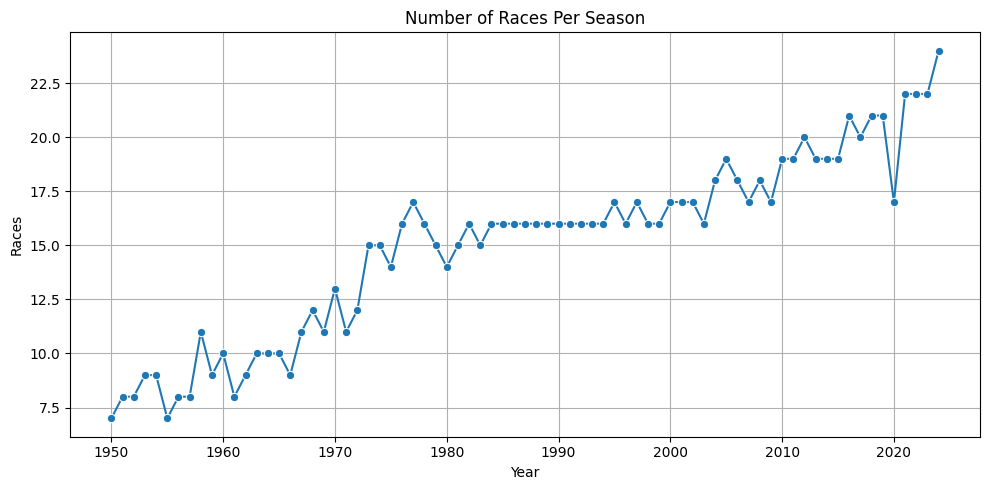

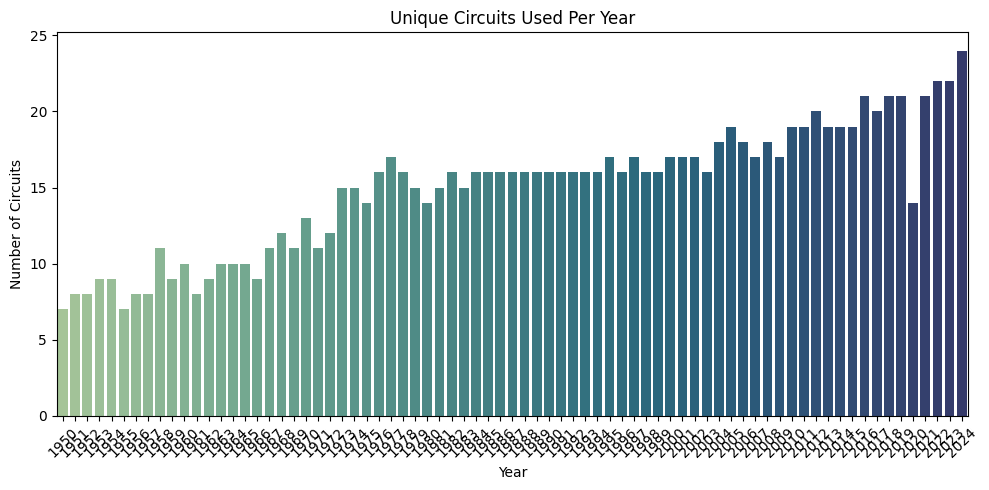

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load datasets
circuits = pd.read_csv("circuits.csv")

# Convert and extract year from race date

# === 1. Races per season ===
races_per_season.columns = ['Year', 'Number of Races']

plt.figure(figsize=(10, 5))
sns.lineplot(data=races_per_season, x='Year', y='Number of Races', marker='o')
plt.title("Number of Races Per Season")
plt.xlabel("Year")
plt.ylabel("Races")
plt.grid(True)
plt.tight_layout()

# === 2. Circuits used each year ===
races_circuits = races.merge(circuits[['circuitId', 'circuitRef']], on='circuitId', how='left')
circuits_per_year = races_circuits.groupby('year')['circuitRef'].nunique().reset_index()
circuits_per_year.columns = ['Year', 'Unique Circuits']

plt.figure(figsize=(10, 5))
sns.barplot(data=circuits_per_year, x='Year', y='Unique Circuits', palette='crest')
plt.title("Unique Circuits Used Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Circuits")
plt.xticks(rotation=45)
plt.tight_layout()

# === 3. New circuits introduced in the last decade ===

recent_circuits = last_decade_races['circuitId'].unique()
older_circuits = previous_races['circuitId'].unique()
new_circuit_ids = set(recent_circuits) - set(older_circuits)

new_circuits = circuits[circuits['circuitId'].isin(new_circuit_ids)][['circuitRef', 'location', 'country', 'lat', 'lng']]
print("\n✅ New Circuits Introduced in the Last Decade:\n")
print(new_circuits)

# === Plot New Circuits on World Map ===
fig = px.scatter_geo(
    new_circuits,
    lat='lat',
    lon='lng',
    text='circuitRef',
    hover_name='circuitRef',
    color='country',
    title='New Circuits Introduced in the Last Decade',
    projection='natural earth'
)
fig.update_traces(marker=dict(size=6))
fig.show()


## 🇮🇹 Countries that hosted most F1 Races

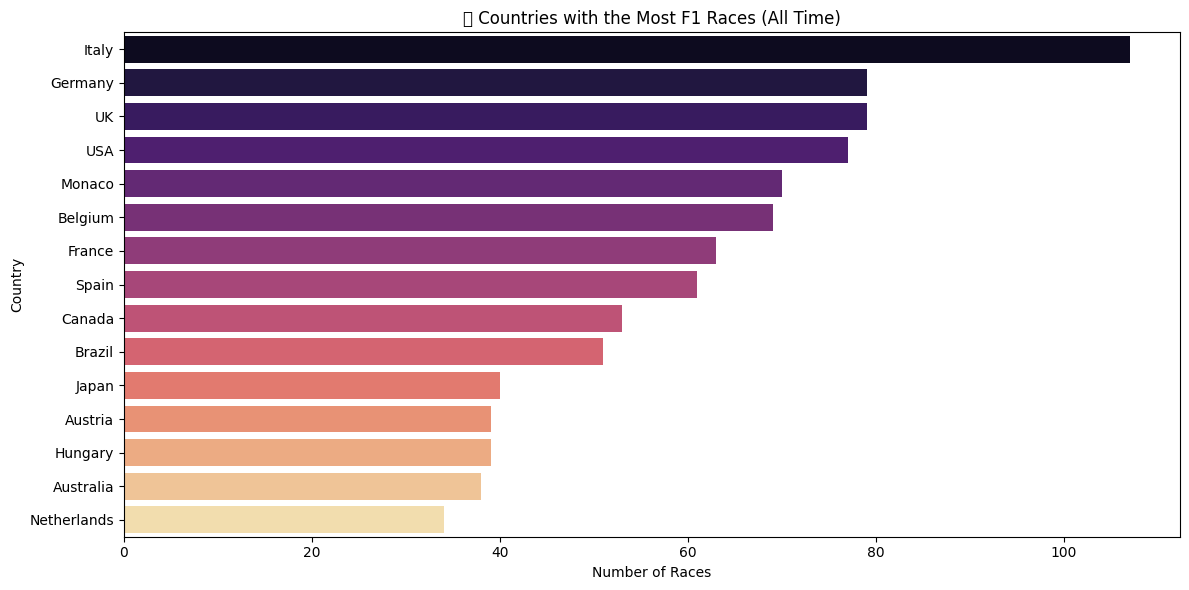

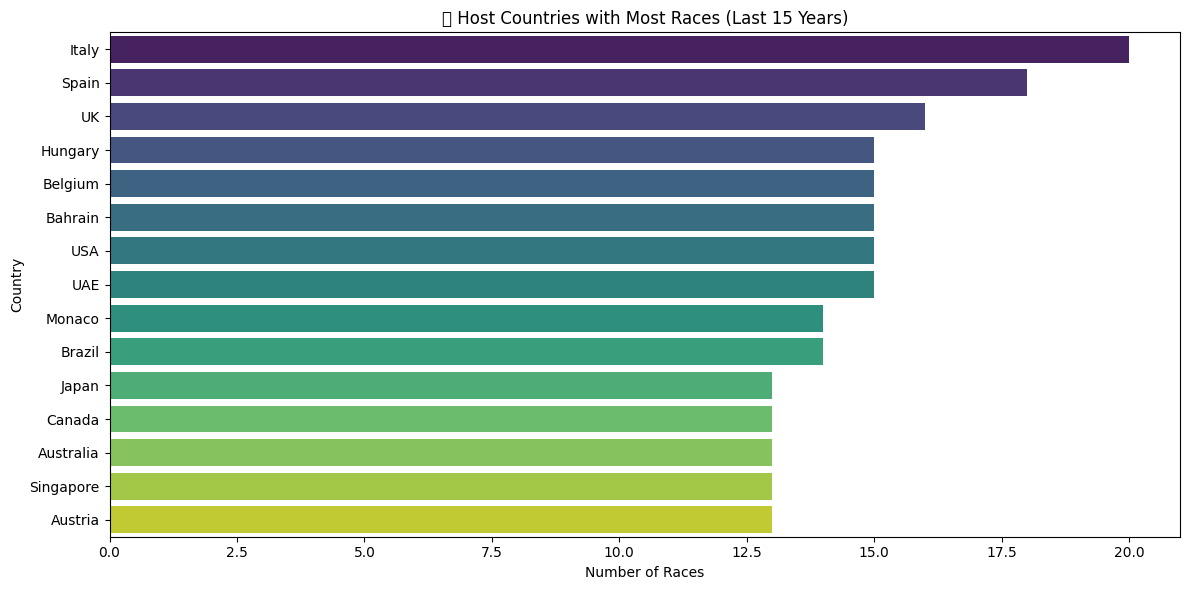

In [34]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load datasets
circuits = pd.read_csv("circuits.csv")

# Convert race date and extract year

# Merge races with circuits
races_with_circuits = races.merge(
    circuits[['circuitId', 'circuitRef', 'location', 'country', 'lat', 'lng']],
    on='circuitId', how='left'
)

# === 1. Interactive World Map of Circuits ===
unique_circuits = races_with_circuits[['circuitRef', 'location', 'country', 'lat', 'lng']].drop_duplicates()

fig = px.scatter_geo(
    unique_circuits,
    lat='lat',
    lon='lng',
    hover_name='circuitRef',
    text='location',
    color='country',
    title='🌍 F1 Circuits Around the World',
    projection='natural earth'
)
fig.update_traces(marker=dict(size=6))
fig.show()

# === 2. Race density by country (all-time) ===
race_density_country = races_with_circuits['country'].value_counts().reset_index()
race_density_country.columns = ['Country', 'Number of Races']

plt.figure(figsize=(12, 6))
sns.barplot(data=race_density_country.head(15), x='Number of Races', y='Country', palette='magma')
plt.title("🏁 Countries with the Most F1 Races (All Time)")
plt.xlabel("Number of Races")
plt.ylabel("Country")
plt.tight_layout()

# === 3. Host countries with most races in the last 15 years ===
recent_races = races_with_circuits[races_with_circuits['year'] >= races_with_circuits['year'].max() - 14]
recent_country_counts = recent_races['country'].value_counts().reset_index()
recent_country_counts.columns = ['Country', 'Races in Last 15 Years']

plt.figure(figsize=(12, 6))
sns.barplot(data=recent_country_counts.head(15), x='Races in Last 15 Years', y='Country', palette='viridis')
plt.title("📆 Host Countries with Most Races (Last 15 Years)")
plt.xlabel("Number of Races")
plt.ylabel("Country")
plt.tight_layout()


## 🎯 Showcasing Sprint Race Results

In [28]:
import pandas as pd

sprint_results = pd.read_csv("sprint_results.csv")
print(sprint_results.columns)
print(sprint_results.head())


Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'fastestLapTime', 'statusId'],
      dtype='object')
   resultId  raceId  driverId  constructorId  number  grid position  \
0         1    1061       830              9      33     2        1   
1         2    1061         1            131      44     1        2   
2         3    1061       822            131      77     3        3   
3         4    1061       844              6      16     4        4   
4         5    1061       846              1       4     6        5   

  positionText  positionOrder  points  laps       time milliseconds  \
0            1              1       3    17  25:38.426      1538426   
1            2              2       2    17     +1.430      1539856   
2            3              3       1    17     +7.502      1545928   
3            4              4       0    17  

In [29]:
# Make sure the column is actually named 'position'
sprint_results['position'] = pd.to_numeric(sprint_results['position'], errors='coerce')

# Now filter for sprint winners
sprint_winners = sprint_results[sprint_results['position'] == 1]
print(f"Sprint Winners Found: {len(sprint_winners)}")
print(sprint_winners.head())


Sprint Winners Found: 18
    resultId  raceId  driverId  constructorId  number  grid  position  \
0          1    1061       830              9      33     2       1.0   
20        21    1065       822            131      77     1       1.0   
40        41    1071       822            131      77     2       1.0   
60        61    1077       830              9       1     1       1.0   
80        81    1084       830              9       1     1       1.0   

   positionText  positionOrder  points  laps       time milliseconds  \
0             1              1       3    17  25:38.426      1538426   
20            1              1       3    18  27:54.078      1674078   
40            1              1       3    24  29:09.559      1749559   
60            1              1       8    21  30:39.567      1839567   
80            1              1       8    23  26:30.059      1590059   

   fastestLap fastestLapTime  statusId  
0          14       1:30.013         1  
20          9       1

## ⏱️ Top Sprint Race Winners


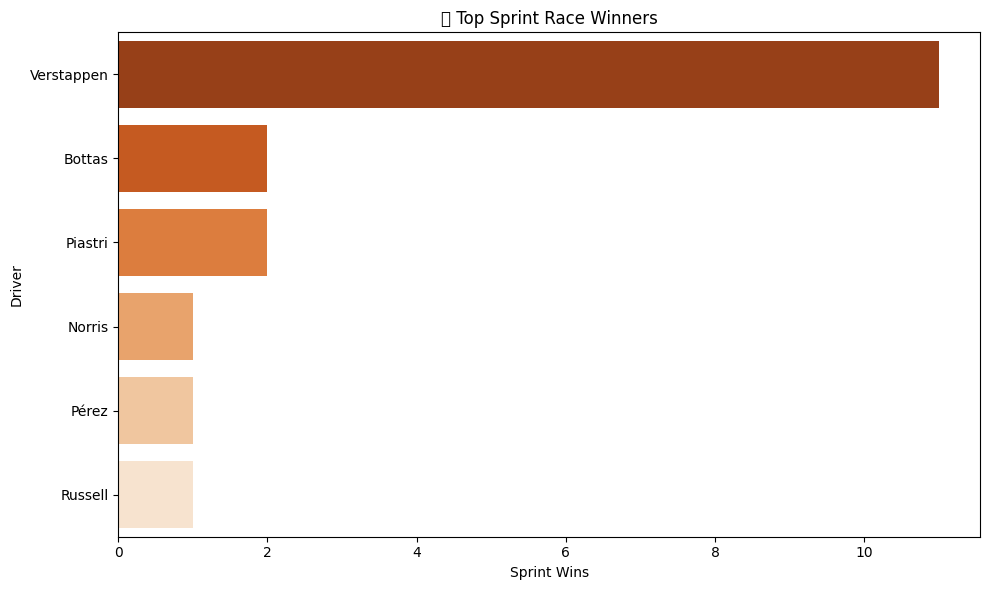

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load sprint results and related data
sprint_results = pd.read_csv("sprint_results.csv")
drivers = pd.read_csv("drivers.csv")

# Convert date and extract year

# Filter for sprint winners using correct column
sprint_winners = sprint_results[sprint_results['positionOrder'] == 1]

# Merge with driver names and race year
sprint_winners = sprint_winners.merge(drivers[['driverId', 'surname']], on='driverId', how='left')
sprint_winners = sprint_winners.merge(races[['raceId', 'year']], on='raceId', how='left')

# Summarize
sprint_summary = sprint_winners.groupby('surname').size().reset_index(name='Sprint Wins')
sprint_summary = sprint_summary.sort_values(by='Sprint Wins', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=sprint_summary.head(10), x='Sprint Wins', y='surname', palette='Oranges_r')
plt.title("🏁 Top Sprint Race Winners")
plt.xlabel("Sprint Wins")
plt.ylabel("Driver")
plt.tight_layout()


## 📈 Trends over Time

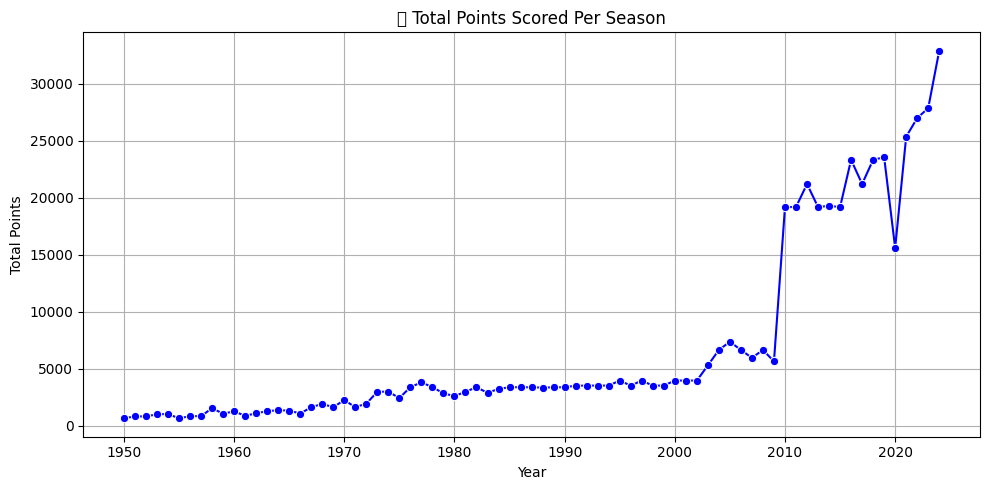

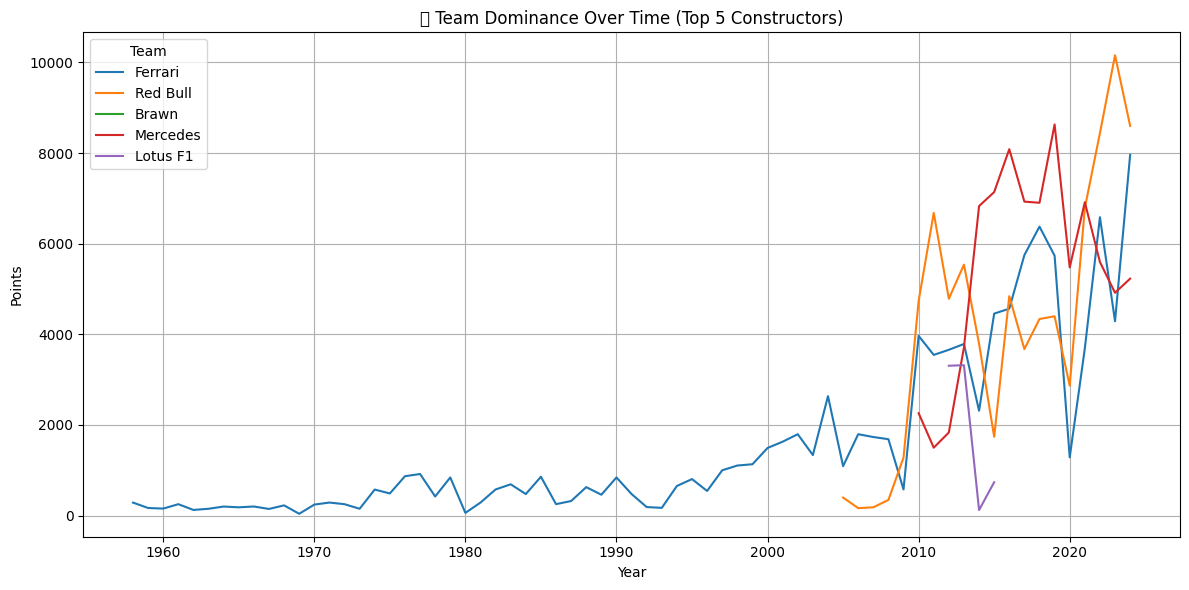

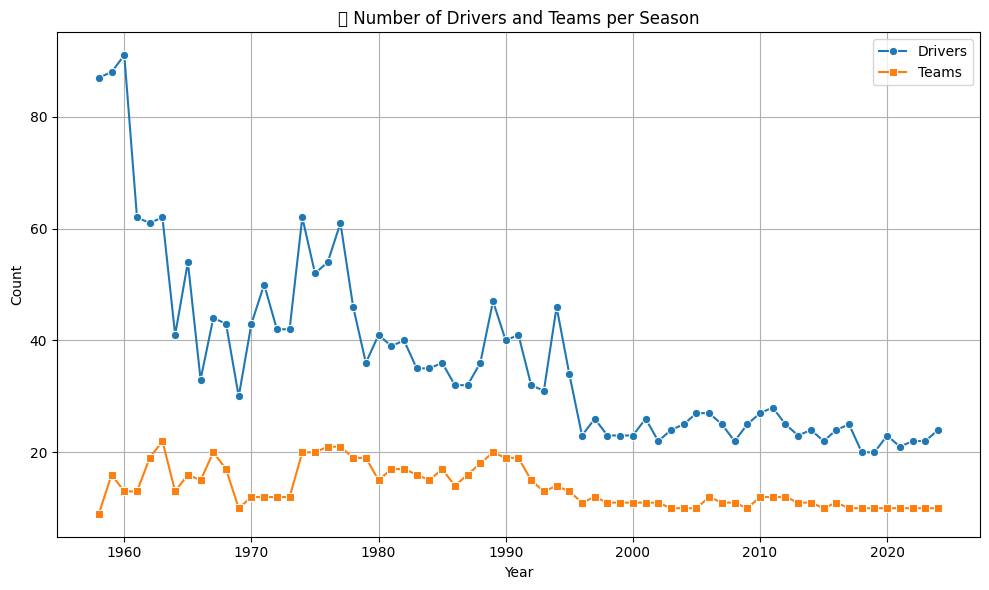

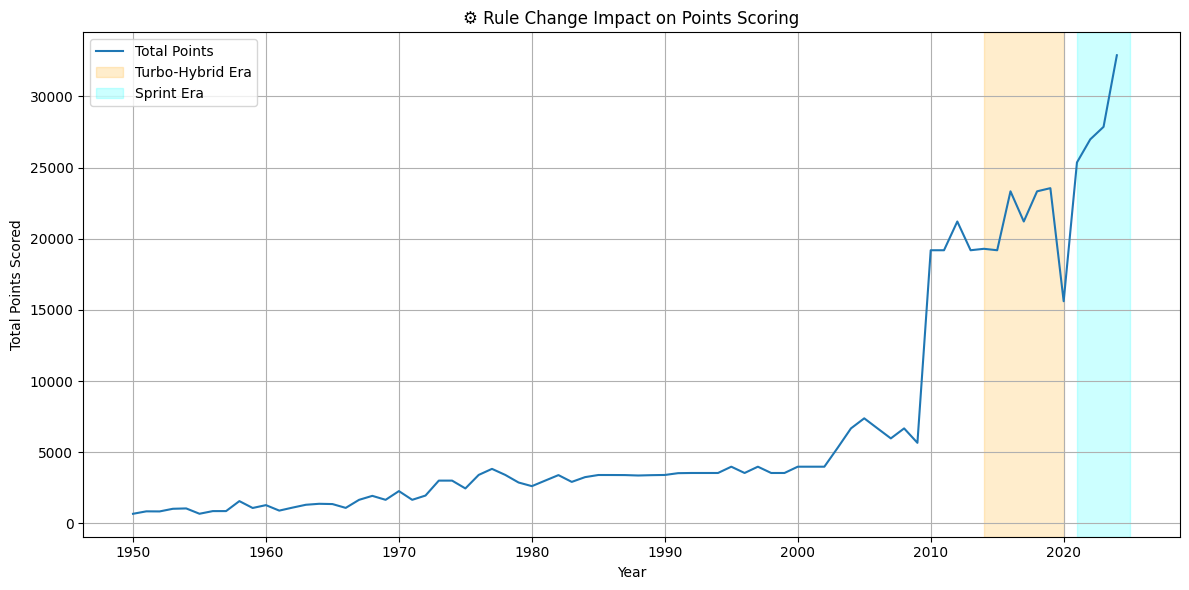

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
driver_standings = pd.read_csv("driver_standings.csv")
constructor_standings = pd.read_csv("constructor_standings.csv")
constructors = pd.read_csv("constructors.csv")
drivers = pd.read_csv("drivers.csv")

# Extract year from race date

# Merge year into standings
driver_standings = driver_standings.merge(races[['raceId', 'year']], on='raceId', how='left')
constructor_standings = constructor_standings.merge(races[['raceId', 'year']], on='raceId', how='left')

# === 1. Points scoring evolution ===
points_per_year = driver_standings.groupby('year')['points'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=points_per_year, x='year', y='points', marker='o', color='blue')
plt.title("🏆 Total Points Scored Per Season")
plt.xlabel("Year")
plt.ylabel("Total Points")
plt.grid(True)
plt.tight_layout()

# === 2. Team dominance periods ===
constructor_standings = constructor_standings.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')
top_teams = constructor_standings.groupby(['year', 'name'])['points'].sum().reset_index()

# Get top 5 teams by average points
top5_teams = top_teams.groupby('name')['points'].mean().sort_values(ascending=False).head(5).index
top_teams_filtered = top_teams[top_teams['name'].isin(top5_teams)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_teams_filtered, x='year', y='points', hue='name')
plt.title("📈 Team Dominance Over Time (Top 5 Constructors)")
plt.xlabel("Year")
plt.ylabel("Points")
plt.legend(title='Team')
plt.grid(True)
plt.tight_layout()

# === 3. Number of drivers and teams per season ===
drivers_per_year = driver_standings.groupby('year')['driverId'].nunique().reset_index(name='Drivers')
teams_per_year = constructor_standings.groupby('year')['constructorId'].nunique().reset_index(name='Teams')
participation = drivers_per_year.merge(teams_per_year, on='year')

plt.figure(figsize=(10, 6))
sns.lineplot(data=participation, x='year', y='Drivers', label='Drivers', marker='o')
sns.lineplot(data=participation, x='year', y='Teams', label='Teams', marker='s')
plt.title("👥 Number of Drivers and Teams per Season")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()

# === 4. Rule change era impact ===
plt.figure(figsize=(12, 6))
sns.lineplot(data=points_per_year, x='year', y='points', label='Total Points')

# Annotated F1 eras
plt.axvspan(2014, 2020, color='orange', alpha=0.2, label='Turbo-Hybrid Era')
plt.axvspan(2021, 2025, color='cyan', alpha=0.2, label='Sprint Era')
plt.title("⚙️ Rule Change Impact on Points Scoring")
plt.xlabel("Year")
plt.ylabel("Total Points Scored")
plt.legend()
plt.grid(True)
plt.tight_layout()


## 🏁 Career Trajectory of Driver, Wins by Teams, Most wins on Tracks and Nationality of the drivers

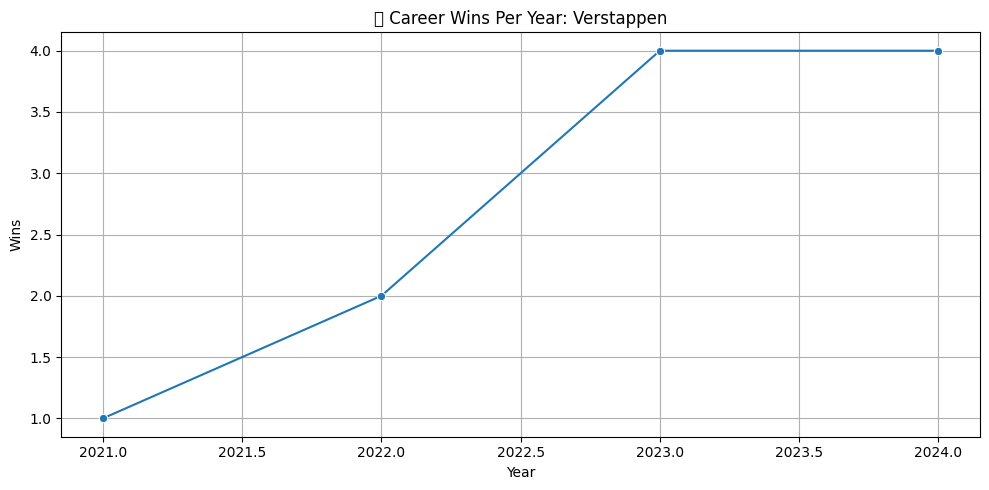

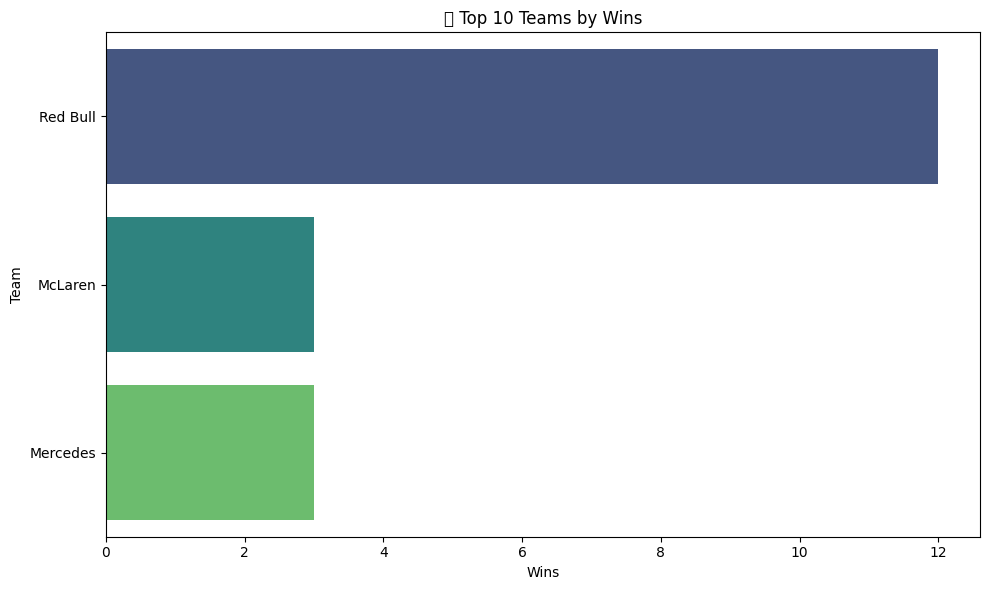

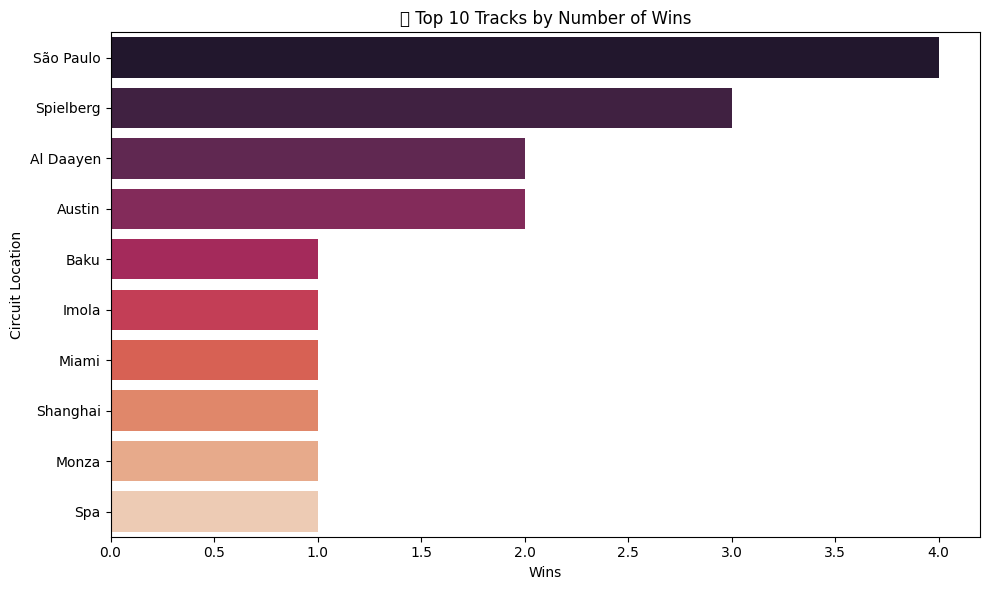

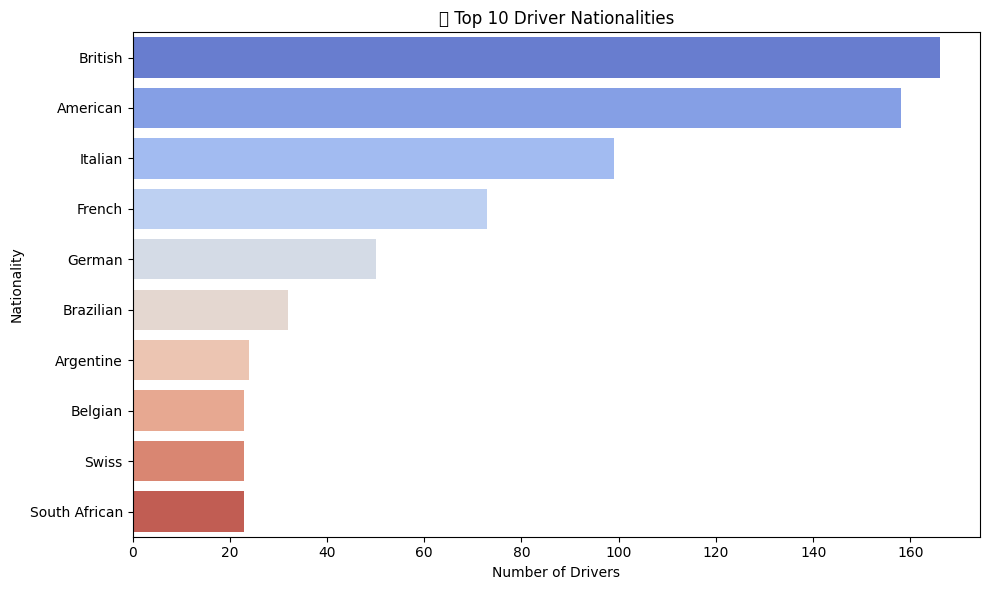

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
results = pd.read_csv("sprint_results.csv")
drivers = pd.read_csv("drivers.csv")
constructors = pd.read_csv("constructors.csv")
circuits = pd.read_csv("circuits.csv")

# Process race year

# Merge all relevant data
results = results.merge(races[['raceId', 'year', 'circuitId']], on='raceId', how='left')
results = results.merge(drivers[['driverId', 'surname', 'nationality']], on='driverId', how='left')
results = results.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')
results = results.merge(circuits[['circuitId', 'location', 'country']], on='circuitId', how='left')

# === 1. Career trajectory of a selected driver ===
driver_name = 'Verstappen'
driver_results = results[results['surname'] == driver_name]
wins_by_year = driver_results[driver_results['positionOrder'] == 1].groupby('year').size().reset_index(name='Wins')

plt.figure(figsize=(10, 5))
sns.lineplot(data=wins_by_year, x='year', y='Wins', marker='o')
plt.title(f"🏎️ Career Wins Per Year: {driver_name}")
plt.xlabel("Year")
plt.ylabel("Wins")
plt.grid(True)
plt.tight_layout()

# === 2. Wins by team ===
team_wins = results[results['positionOrder'] == 1].groupby('name').size().reset_index(name='Wins')
team_wins = team_wins.sort_values(by='Wins', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=team_wins, x='Wins', y='name', palette='viridis')
plt.title("🏆 Top 10 Teams by Wins")
plt.xlabel("Wins")
plt.ylabel("Team")
plt.tight_layout()

# === 3. Wins by track ===
track_wins = results[results['positionOrder'] == 1].groupby('location').size().reset_index(name='Wins')
track_wins = track_wins.sort_values(by='Wins', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=track_wins, x='Wins', y='location', palette='rocket')
plt.title("🏁 Top 10 Tracks by Number of Wins")
plt.xlabel("Wins")
plt.ylabel("Circuit Location")
plt.tight_layout()

# === 4. Nationality distribution of drivers ===
nationality_count = drivers['nationality'].value_counts().head(10).reset_index()
nationality_count.columns = ['Nationality', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=nationality_count, x='Count', y='Nationality', palette='coolwarm')
plt.title("🌍 Top 10 Driver Nationalities")
plt.xlabel("Number of Drivers")
plt.ylabel("Nationality")
plt.tight_layout()
